In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results.csv")

In [3]:
df.head()

,url,ip,doh1,doh2,doh3,doh4,doh5,dns1,dns2,dns3,dns4,dns5,doh packets,dns packets
0,facebook.com,157.240.1.35,1197.999954,79.999924,71.000099,75.000048,73.999882,337.000132,16.999960,13.000011,12.000084,11.999846,15,2
1,twitter.com,104.244.42.65,75.999975,68.000078,71.000099,75.999975,78.999996,11.999846,11.999846,12.000084,13.000011,23.999929,15,2
2,google.com,173.194.76.100,69.999933,74.000120,87.000132,72.999954,76.999903,16.000032,13.000011,13.000011,13.000011,13.000011,15,2
3,youtube.com,173.194.76.93,77.000141,75.999975,81.000090,74.999809,77.999830,22.000074,13.000011,13.999939,16.000032,13.000011,15,2
4,instagram.com,54.210.70.115,75.000048,73.999882,72.999954,73.999882,83.999872,15.000105,13.999939,11.999846,13.000011,15.000105,16,2


In [16]:
df.columns[7:12]

Index(['dns1', 'dns2', 'dns3', 'dns4', 'dns5'], dtype='object')

In [12]:
df["doh_mean"] = df[df.columns[2:7]].mean(axis=1)

In [17]:
df["dns_mean"] = df[df.columns[7:12]].mean(axis=1)

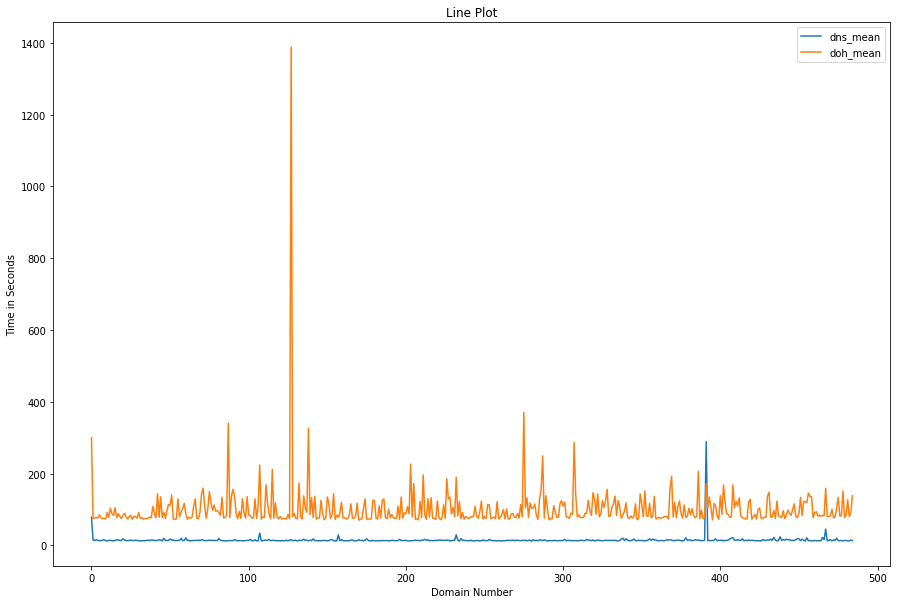

In [47]:
_ = df[["dns_mean", "doh_mean"]].plot(kind = "line", figsize = (15,10), title = "Line Plot", legend  = True)
plt.xlabel('Domain Number')
plt.ylabel('Time in Seconds')
plt.show()

In [20]:
df.dns_mean.median()

13.599967953999998

In [21]:
df.doh_mean.median()

83.600044258

In [31]:
df[["dns packets", "doh packets"]].describe()

,dns packets,doh packets
count,485.0,485.000000
mean,2.0,15.490722
std,0.0,0.654306
min,2.0,15.000000
25%,2.0,15.000000
50%,2.0,15.000000
75%,2.0,16.000000
max,2.0,20.000000


In [49]:
df[["dns_mean", "doh_mean"]].describe()

,dns_mean,doh_mean
count,485.000000,485.000000
mean,14.825977,101.398351
std,13.068133,69.077431
min,11.800003,70.199966
25%,12.800074,76.599979
50%,13.599968,83.600044
75%,14.400005,113.199997
max,288.999987,1388.799953


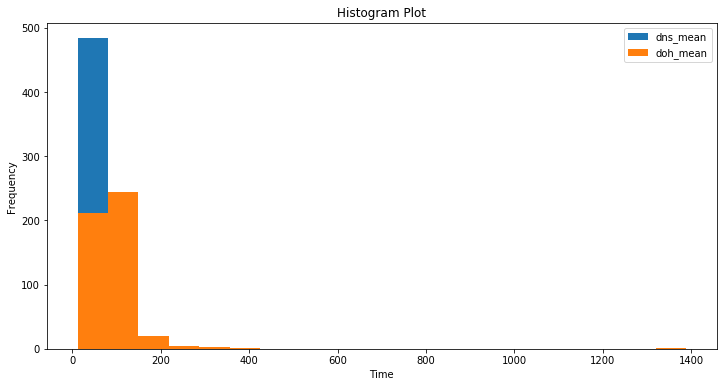

In [52]:
_ = df[["dns_mean", "doh_mean"]].plot(kind = "hist", figsize = (12,6), title = "Histogram Plot", legend  = True, bins = 20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

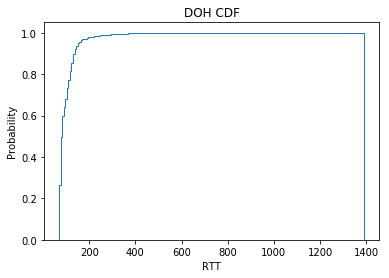

In [29]:
plt.hist(df.doh_mean, density = True, cumulative=True, label='CDF',histtype='step', bins=200)
plt.xlabel('RTT')
plt.ylabel('Probability')
plt.title("DOH CDF")
plt.show()

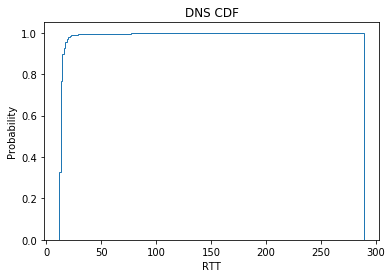

In [26]:
plt.hist(df.dns_mean, density = True,cumulative=True, label='CDF',histtype='step', bins=200)
plt.xlabel('RTT')
plt.ylabel('Probability')
plt.title("DNS CDF")
plt.show()